## The great 1 dimensional bandstructure function
 **Autors:** *Klára Nováková* and *Andris Potrebko* with a vital teoretical support of *Andreas Wacker*, *Tor Sjöstrand* and *Hofmanns* book *Solid State Physics*
 
**Year:** *2019*

* If you are looking at this file from the universities computer which is used for the lab, then please leave everything exactly the way it was before.

* The file is structured to be able to run cell by cell. If any of the variable is unclear, it is possible to create a new cell by pressing *Esc* and then *A* and play around. The shortcut to delete cell: *Esc* and then *D+D*.

* In the following document, the one dimensional bandstructure of a crystal is solved using the Plane wave basis approximation (further described in the lab manual, here only a summary of presented, stating main variables).

* In this case the atomic potential is approximated by the Gaussian potential $V(x)=-U\sum_n e^{-(x-na)^2/2\sigma^2}$. This potential can be written in the Fourier components as $V(x)=\sum_{G_j}-U\sqrt {2\pi}\frac{\sigma}{a}e^{-G^2_j \sigma^2/2} e^{i G_j x} \equiv  \sum_{G_j} V_{G_j} \cdot e^{i G_j x}$,
where $G_j$ is a reciprocal lattice vector.

* The ampliture of $V_G$, we denote as $A$, that is $A \equiv -U\sqrt {2\pi}\frac{\sigma}{a}$ and  $V_G = A e^{-G^2 \sigma^2/2} $.

* In order to obtain the energy spectrum or the band structure we need to solve the following eigenvalue equation:
$\Big( \frac{\hbar^2 (k+K)^2}{2m} - \varepsilon \Big) c_{k+K} +\sum_G c_{k+K-G} V_G$ and search for $\varepsilon$ - the energy eigenvalues.


### Necessary imports

In [55]:
# Usual imports
import matplotlib.pyplot as plt
%matplotlib notebook 
import numpy as np

import matplotlib
plt.style.use("default")
# Widgets imports
import panel as pn

There are many variables involving *k* but it is important that you note the differences;
* *K* the reciprocal lattice vector and *k* the wave vector $k\in [-\pi/a; \pi/a]$ 
* The number of *k* vectors in our lattice is *Len_k*
* *MaxK* is the maximal reciprocal lattice vector we consider to include in the sum ($K$ or $K-G$) thus the summation goes from *-MaxK* to *MaxK*.

### Definition of initial values

In [56]:
a = 3  # Lattice constant in Ångstrongs
sigma = 0.5  # Very arbitrary value
U = 11  # eV
maxK = 6
Len_k = 15  # How fine to calculate the band structure
NrOfK = maxK*2+1
A = -U*np.sqrt(2 * np.pi)*sigma/a

*BandStructureFunction.ipynb* file contains a function *BandStructF* which creates the matrix for the eigenvalue equation described above and solves for the eigenvalues - energies.
*%run* is one of the so-called magic functions and does the import of the function found in the file *BandStructureFunction.ipynb*.

In [57]:
%run BandStructureFunction.ipynb

Solve eigenvalue equation for each wave number *k*
* Put k vector into right magnitude.  Before *k* is some integer $k =.. -2,-1,0,1..$. Save the obtained value in *kVect*
* Save calculated energies in *Energies*
* Uncomment "%%time" to measure the calculation time of the cell

In [58]:
# %%time
Energies = np.zeros(shape=(Len_k*2+1, NrOfK))
# Vector for plotting containing all of the k values in 1/Angstrom
kVect = [0]*(Len_k*2+1)
for ki in range(-Len_k, Len_k+1):  # k vector for which we are calculating
    k = np.pi/(a)*ki/Len_k
#     %run BandStructureFunction.ipynb
    E = BandStructF()
    Energies[ki+Len_k] = np.real(E)
    kVect[ki+Len_k] = k  # in 1/Angstrom

## Plots

### Plot potential

Plots are hidden so that they would not appear when running the interface. To make the plots visible either comment out the lines containg *%%capture* or comment out the cell containing *fig*.

In [59]:
%%capture
from matplotlib import pyplot as plt
# If you want to display the figure here, then uncomment previous line
%matplotlib notebook
%matplotlib notebook
fig, [ax, ax2] = plt.subplots(nrows=1, ncols=2)  # Two plots in the same figure
fig.set_size_inches(9.5, 3.5)
fig.subplots_adjust(wspace=0.4, bottom=0.2)  # Margins around the subplots


x = np.linspace(-5*a, 5*a, 401)
# length of the x vector should be an odd number so that 0 is included,
# otherwise it does not plot the peak correctly
Vx = -U*np.exp(-x**2/(2*sigma**2))
VxSum = [0]*len(x)
for n in range(-5, 6):
    Vx1 = -U*np.exp(-(x-n*a)**2/(2*sigma**2))
    ax.plot(x, Vx1, 'y--')
    VxSum = VxSum+Vx1
ax.plot(x, VxSum)
ax.plot(x, Vx)
ax.set(xlabel='x, ($\AA$)', ylabel='V (eV)', title='Atomic potential')

### Plot energies

In [60]:
%%capture
ax2.plot(kVect, Energies[:, 0:5], color='purple')
ax2.set(xlabel='k ($1/ \AA$)', ylabel='E (eV)', title='Band structure')

In [61]:
# fig

### Creating an interactive user interface

Function *f* repeats the steps above whenever some of the widgets are going to be used. Function *interactive* creates these widgets and connects them to the function *f*.

In [64]:
def f(Lattice_Constant=a, Amplitude=U, NumKVec=maxK, PlotK=5):
    global a, A, k, Len_k, maxK, U, NrOfK
    a = Lattice_Constant
    U = Amplitude
    maxK = NumKVec
    A = -U*np.sqrt(2 * np.pi)*sigma/a  # np.sqrt(2*sigma)
    NrOfK = maxK*2+1
    Energies = np.zeros(shape=(Len_k*2+1, NrOfK))
    kVect = [0]*(Len_k*2+1)
    for ki in range(-Len_k, Len_k+1):
        k = np.pi/(a)*ki/Len_k
        E = BandStructF()
#         %run BandStructureFunction.ipynb
        Energies[ki+Len_k] = np.real(E)
        kVect[ki+Len_k] = k
    
    
    fig = plt.figure(figsize=(6, 4),constrained_layout=True)
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    fig.patch.set_facecolor('white') 

    ax1.set(facecolor = "white")
    ax2.set(facecolor = "white")
    
    ax1.set(xlabel='x, ($\AA$)', ylabel='V (eV)', title='Atomic potential')
    x = np.linspace(-5*a, 5*a, 401)
    Vx = -U*np.exp(-x**2/(2*sigma**2))
    VxSum = [0]*len(x)
    for n in range(-5, 6):
        Vx1 = -U*np.exp(-(x-n*a)**2/(2*sigma**2))
        ax1.plot(x, Vx1, 'y--')
        VxSum = VxSum+Vx1

    ax1.plot(x, VxSum)
    ax1.plot(x, Vx)

    ax2.set(xlabel='k ($1/ \AA$)', ylabel='E (eV)', title='Band structure')
    ax2.plot(kVect, Energies[:, 0:PlotK], color='purple')
    plt.close(fig) 
    return fig


#The_Interaction = interactive(f, Lattice_Constant=(1, 10, 0.5), Amplitude=(
#    0, 100, 1), NumKVec=(1, 20, 1), PlotK=(0, 10, 1))

<IPython.core.display.Javascript object>


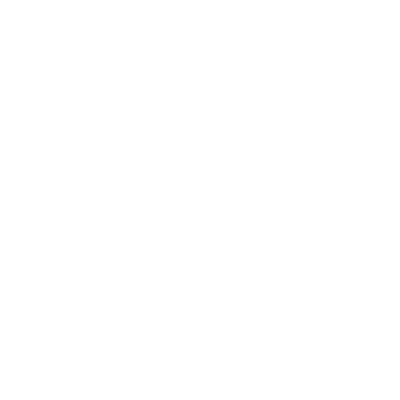

In [65]:
pn.extension()

s1 = pn.widgets.FloatSlider(name='Lattice constant (Å)', start=1.0, end=10, step=0.5, value=3.0)
s2 = pn.widgets.FloatSlider(name='Potential depth (eV)', start=0.0, end=100, step=1, value=11)
s3 = pn.widgets.IntSlider(name='N of K vectors', start=1, end=20, step=1, value=6)
s4 = pn.widgets.IntSlider(name='How many bands to plot', start=0, end=11, step=1, value=5)


interactive = pn.bind(f, Lattice_Constant=s1, Amplitude=s2, NumKVec=s3, PlotK=s4)

sliders_layout = pn.Column(
    pn.Row(s1, s2),
    pn.Row(s3,s4)  # dropdown with 2nd row
)

ui = pn.Column(
    sliders_layout,
    pn.panel(interactive, tight=True)
)

